# Propensity Model  Capstone Project

### Problem Statement

This project is aimed at building a **Propensity Model To Identify Potential Customers.**

### Import Libraries

In [1]:
## Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Z-score for Outlier treatment
from scipy.stats import zscore

## Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

## Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier 
from sklearn.neural_network import MLPClassifier

## Model Evaluation Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

## Libraries for Hyperparameter Tuning and Cross Validation
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

pd.set_option('display.max_columns', None)

### Read Dataset

In [2]:
## Read Dataset
data = pd.read_excel('train.xlsx')

## Shape of dataset
data.shape

(8240, 24)

In [3]:
## First 5 rows
data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,35.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,6.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0


In [4]:
# Last 5 Rows
data.tail()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
8235,32.0,self-employed,single,university.degree,no,no,no,cellular,apr,thu,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.435,5099.1,999.0,0.0,yes,208.000000,8236.0
8236,NaN,housemaid,married,university.degree,no,no,no,cellular,jun,tue,1.0,999.0,0.0,nonexistent,-2.9,92.963,-40.8,1.099,5076.2,999.0,0.0,yes,129.000000,8237.0
8237,85.0,housemaid,married,NaN,unknown,yes,no,cellular,apr,tue,1.0,999.0,1.0,failure,-1.8,93.749,-34.6,0.642,5008.7,999.0,1.0,yes,33.000000,8238.0
8238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.112069,NaN
8239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87622.112070,NaN


### Dropping Unwanted rows

In [5]:
### Dropping last 2 Rows as the they are sum and average of profit column
data.drop(index=data.index[-2:], inplace=True)

In [6]:
data.tail()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
8233,55.0,retired,married,high.school,no,yes,no,cellular,oct,thu,2.0,7.0,1.0,success,-3.4,92.431,-26.9,0.722,5017.5,0.233333,0.0,yes,203.0,8234.0
8234,41.0,admin.,divorced,high.school,no,no,no,telephone,jun,mon,11.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,999.000000,0.0,yes,188.0,8235.0
8235,32.0,self-employed,single,university.degree,no,no,no,cellular,apr,thu,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.435,5099.1,999.000000,0.0,yes,208.0,8236.0
8236,NaN,housemaid,married,university.degree,no,no,no,cellular,jun,tue,1.0,999.0,0.0,nonexistent,-2.9,92.963,-40.8,1.099,5076.2,999.000000,0.0,yes,129.0,8237.0
8237,85.0,housemaid,married,NaN,unknown,yes,no,cellular,apr,tue,1.0,999.0,1.0,failure,-1.8,93.749,-34.6,0.642,5008.7,999.000000,1.0,yes,33.0,8238.0


### Dropping Unwanted Columns

In [7]:
data.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded', 'profit', 'id'],
      dtype='object')

In [8]:
### Dropping ID column and Profit column as they are not necessary
data.drop(['id','profit'], axis=1, inplace=True)

## Exploratory Data Analysis

In [9]:
## Count and Dtype of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  previous        8238 non-null   float64
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

In [10]:
## Descriptive Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
custAge,6224.0,39.953728,10.540516,18.000,32.000,38.000,47.000,94.000
campaign,8238.0,2.531682,2.709773,1.000,1.000,2.000,3.000,40.000
pdays,8238.0,960.916606,190.695054,0.000,999.000,999.000,999.000,999.000
previous,8238.0,0.183054,0.514209,0.000,0.000,0.000,0.000,6.000
emp.var.rate,8238.0,0.056397,1.566550,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,8238.0,93.570977,0.578782,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,8238.0,-40.577907,4.650101,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,8238.0,3.586929,1.742784,0.634,1.334,4.857,4.961,5.045
nr.employed,8238.0,5165.575965,72.727423,4963.600,5099.100,5191.000,5228.100,5228.100
pmonths,8238.0,960.687436,191.841012,0.000,999.000,999.000,999.000,999.000


### Finding and Handling Duplicated Values

In [11]:
## Duplicate Values yes or no
data.duplicated().any()

True

In [12]:
## Sum of duplicate rows
data.duplicated().sum()

36

In [13]:
## Duplicate Rows
data[data.duplicated()]

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
1526,49.0,services,married,high.school,no,no,no,cellular,aug,tue,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,999.0,0.0,no
2310,41.0,technician,divorced,university.degree,no,yes,no,cellular,aug,fri,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,999.0,0.0,no
2948,NaN,technician,single,NaN,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0.0,no
3205,34.0,technician,single,university.degree,no,yes,no,cellular,aug,wed,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0.0,no
3228,NaN,technician,married,NaN,no,yes,no,cellular,aug,tue,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,999.0,0.0,no
3447,25.0,admin.,single,high.school,no,no,no,cellular,jul,wed,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,999.0,0.0,no
3495,NaN,admin.,single,university.degree,no,yes,no,cellular,aug,thu,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0.0,no
4346,NaN,management,married,university.degree,no,yes,no,cellular,aug,wed,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0.0,no
4391,28.0,blue-collar,single,NaN,no,no,no,cellular,jul,fri,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no
4409,NaN,services,married,high.school,unknown,no,no,cellular,aug,mon,2.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,999.0,0.0,no


In [14]:
## Dropping Duplicate Rows
data.drop_duplicates(inplace = True)

### Finding and Handling Null values

In [15]:
## Sum of Null Values in each row
data.isnull().sum()

custAge           1999
profession           0
marital              0
schooling         2393
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week        784
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

<Axes: >

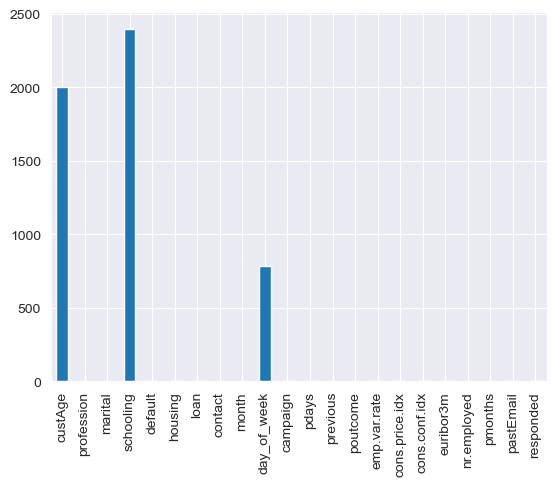

In [16]:
##Plotting Null Values

sns.set_style(style = 'darkgrid')
data.isnull().sum().plot(kind ='bar')

In [17]:
## Imputing Null values using Forward Fill

data['custAge'].fillna(method='ffill', inplace=True)
data['schooling'].fillna(method = 'ffill', inplace=True)
data['day_of_week'].fillna(method = 'ffill', inplace=True)

### Finding and Handling Outliers

In [18]:
data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,35.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no
2,31.0,admin.,single,high.school,no,no,no,telephone,jun,thu,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no
4,39.0,blue-collar,single,university.degree,unknown,yes,no,cellular,jul,tue,6.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no


#### Replacing '999' with -1 as 999 can be considered as outlier and effect the analyis

In [19]:
## Replace 999 with -1
data['pdays'] =data['pdays'].replace(999, -1)
data['pmonths'] =data['pmonths'].replace(999, -1)

In [20]:
data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2.0,-1.0,0.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,-1.0,0.0,no
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,35.0,-1.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,-1.0,0.0,no
2,31.0,admin.,single,high.school,no,no,no,telephone,jun,thu,1.0,-1.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,-1.0,0.0,no
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2.0,-1.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,-1.0,0.0,no
4,39.0,blue-collar,single,university.degree,unknown,yes,no,cellular,jul,tue,6.0,-1.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,-1.0,0.0,no


### Boxplot for Outliers

Text(0, 0.5, 'Values')

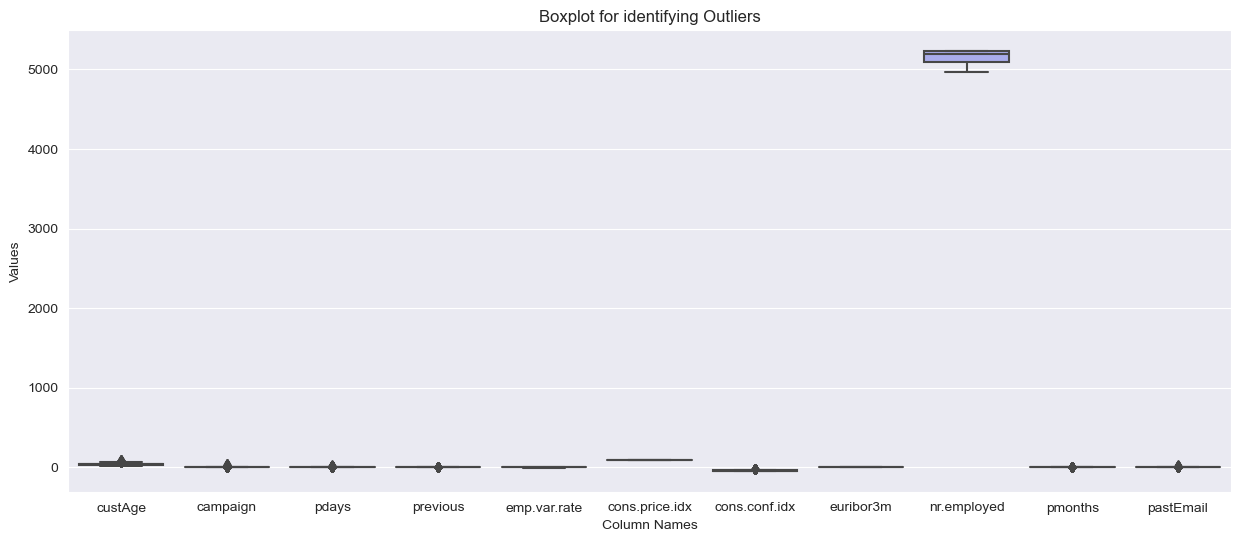

In [21]:
##Plot for Outliers
plt.figure(figsize=(15,6))
sns.boxplot(data)
plt.title('Boxplot for identifying Outliers')
plt.xlabel('Column Names')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

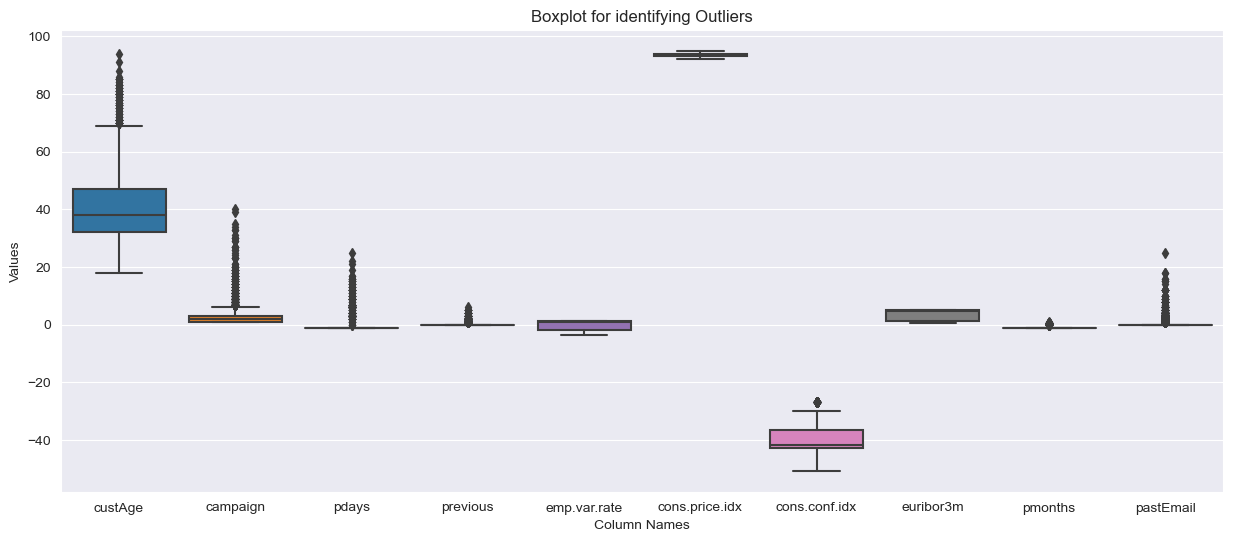

In [22]:
plt.figure(figsize=(15,6))
sns.boxplot(data[['custAge','campaign','pdays', 'previous','emp.var.rate','cons.price.idx','cons.conf.idx',
                 'euribor3m','pmonths','pastEmail']])
plt.title('Boxplot for identifying Outliers')
plt.xlabel('Column Names')
plt.ylabel('Values')

### Finding Outliers using Z Scores

From boxplot we can observe that there are more outlier values in custAge, campaign, pdays and pastEmail columns

In [23]:
# Calculate Z-scores for outlier numeric column
z_scores = data[['custAge','campaign','pdays', 'pastEmail']].apply(zscore)

#Threshold
z_score_threshold = 3

# Identify outliers
outliers = (z_scores.abs() > z_score_threshold)

In [24]:
# Outliers Count
outlier_counts = outliers.sum()
print("Outlier Counts:")
print(outlier_counts)

Outlier Counts:
custAge       85
campaign     164
pdays        185
pastEmail    141
dtype: int64


### Removing Outliers Using Z-Scores

In [25]:
## Identify outliers and prepare cleaned data by removing outliers
outlier_indices = (z_scores > z_score_threshold).any(axis=1)
cleaned_data = data[~outlier_indices]

In [26]:
cleaned_data

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2.0,-1.0,0.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,-1.000000,0.0,no
2,31.0,admin.,single,high.school,no,no,no,telephone,jun,thu,1.0,-1.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,-1.000000,0.0,no
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2.0,-1.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,-1.000000,0.0,no
4,39.0,blue-collar,single,university.degree,unknown,yes,no,cellular,jul,tue,6.0,-1.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,-1.000000,0.0,no
5,40.0,entrepreneur,married,university.degree,no,yes,no,telephone,jun,thu,3.0,-1.0,0.0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,-1.000000,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8230,28.0,admin.,married,university.degree,no,no,no,cellular,apr,thu,1.0,2.0,2.0,success,-1.8,93.075,-47.1,1.365,5099.1,0.066667,0.0,yes
8231,34.0,admin.,single,university.degree,no,yes,no,cellular,aug,wed,1.0,-1.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,-1.000000,0.0,yes
8232,52.0,services,married,high.school,unknown,yes,no,cellular,jul,fri,3.0,-1.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,-1.000000,0.0,yes
8235,32.0,self-employed,single,university.degree,no,no,no,cellular,apr,thu,1.0,-1.0,0.0,nonexistent,-1.8,93.075,-47.1,1.435,5099.1,-1.000000,0.0,yes


### Seperating Categorical and Numerical Columns

In [27]:
categorical = []
numerical = []

## for loop to seperate categorical and numerical columns by datatypes
for col in cleaned_data.columns:
    if cleaned_data[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)

## Display categorical and numerical columns
categorical, numerical

(['profession',
  'marital',
  'schooling',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'responded'],
 ['custAge',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'pmonths',
  'pastEmail'])

## Data Visulaization

### Plot 1: Distribution Of Customer Age who responded and not responded

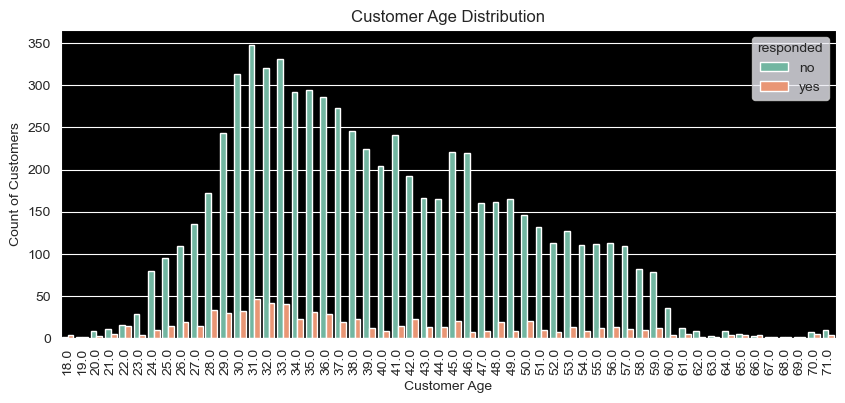

In [28]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize= (10,4))
plt.gca().set_facecolor('black')
sns.countplot(x = 'custAge', data = cleaned_data, hue = 'responded', palette="Set2")
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Count of Customers')
plt.xticks(rotation = 90)
plt.show()

**Responded customers where more around the age of  28 to 38.** 

### Plot 2: Response based on Profession

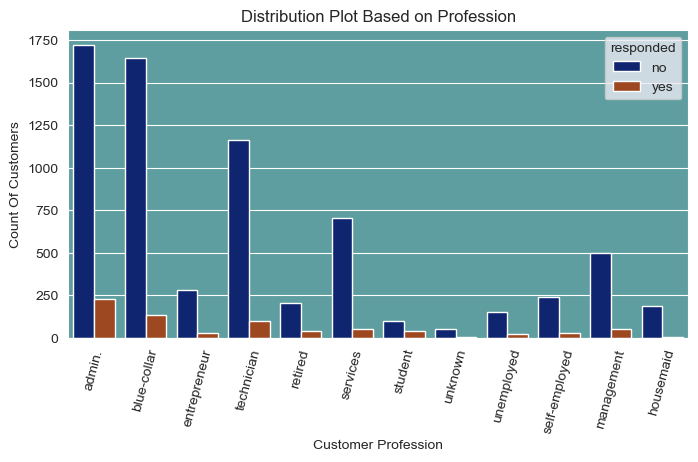

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'profession', data = cleaned_data, hue = 'responded', palette='dark')
plt.gca().set_facecolor('cadetblue')
plt.title('Distribution Plot Based on Profession')
plt.xlabel('Customer Profession')
plt.ylabel('Count Of Customers')
plt.xticks(rotation = 75)
plt.show()

**Most responses are from Admin, Technician and Blue Collar Professions**

### Plot 3: Response of customer who have housing loan and not

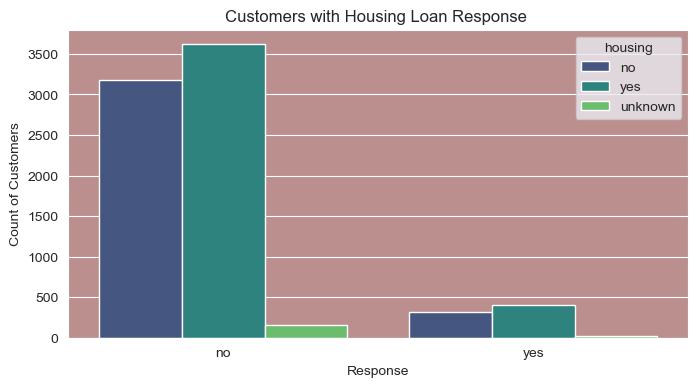

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'responded', data = cleaned_data, hue = 'housing',  palette="viridis")
plt.gca().set_facecolor('rosybrown')
plt.title('Customers with Housing Loan Response ')
plt.xlabel('Response')
plt.ylabel('Count of Customers')
plt.show()

**Customers with housing loan responded more**

### Plot 4: Histplot for Marital Status

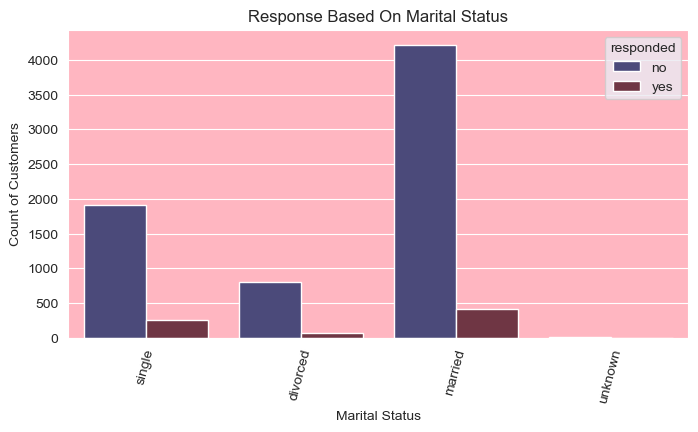

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(data = cleaned_data , x = 'marital', hue='responded', palette='icefire')
plt.gca().set_facecolor('lightpink')
plt.title('Response Based On Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count of Customers')
plt.xticks(rotation = 75)
plt.show()

**Married Customers responded the most**

### Plot 5: Pairplot For Numerical Columns

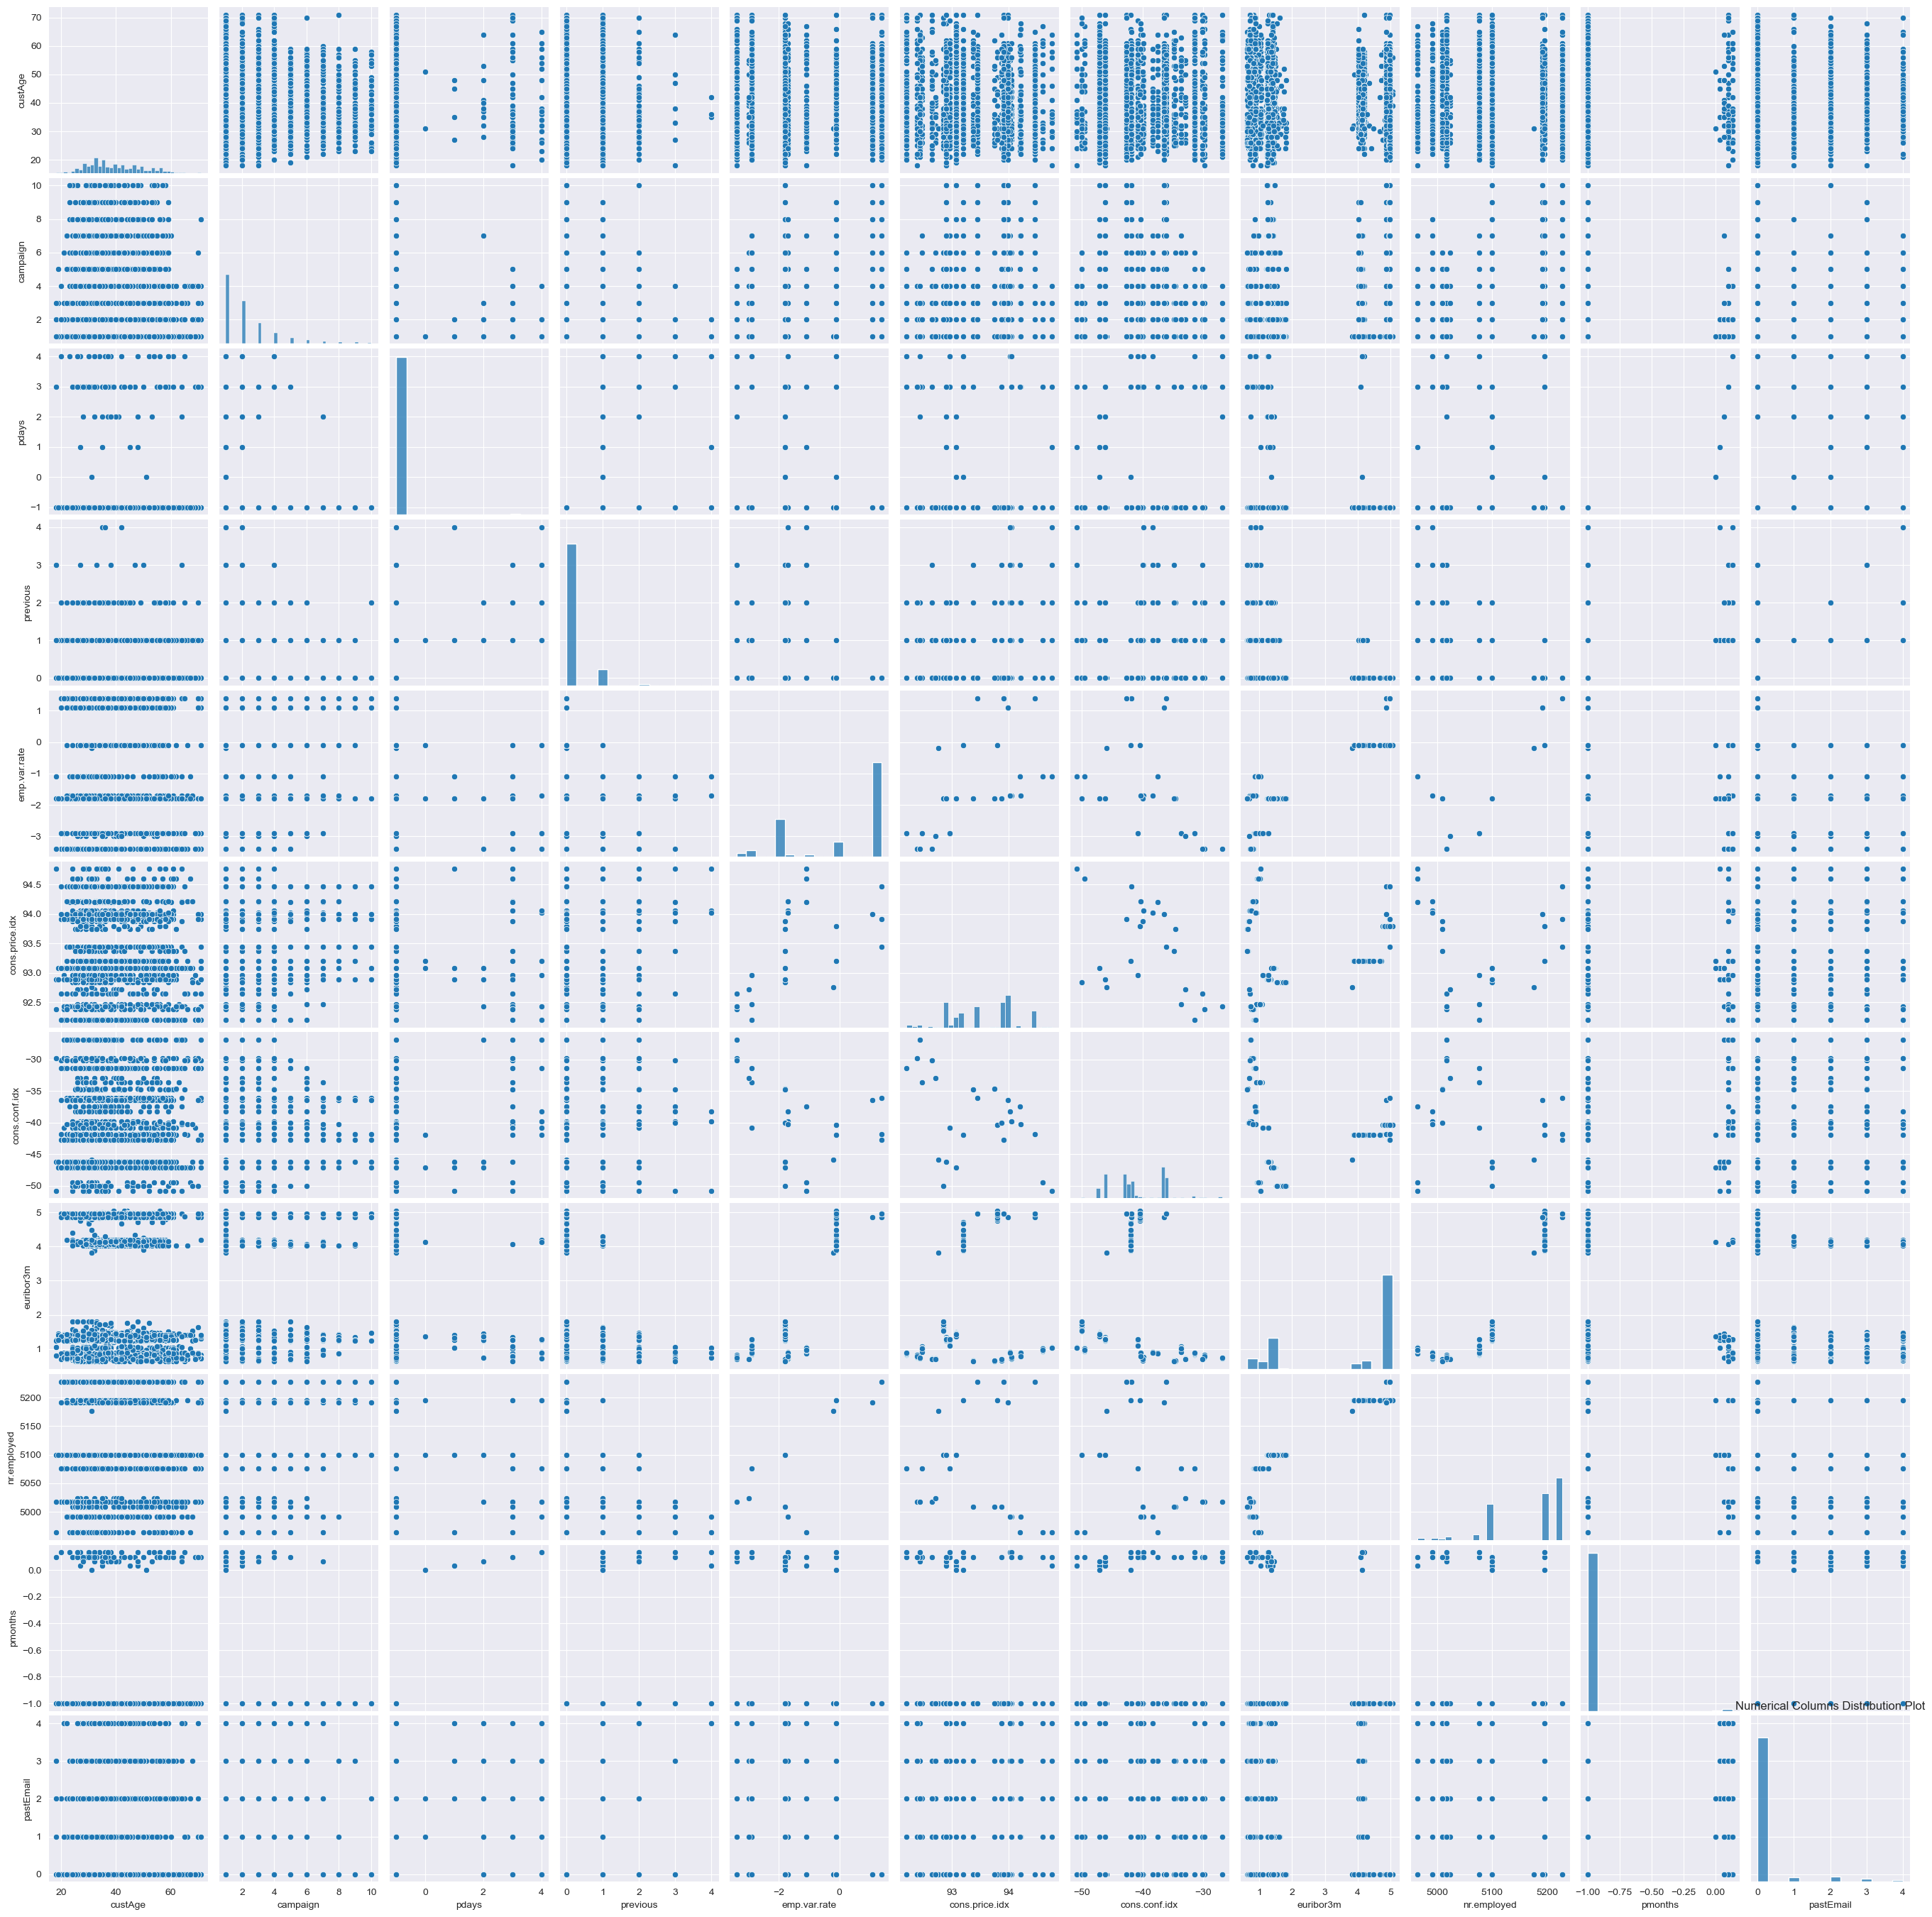

In [32]:
sns.pairplot(data = cleaned_data)
plt.title('Numerical Columns Distribution Plot')
plt.show()

**Pairplot Displays the distribution between all numerical columns**

### Plot 6: Distribution Using CountPlot

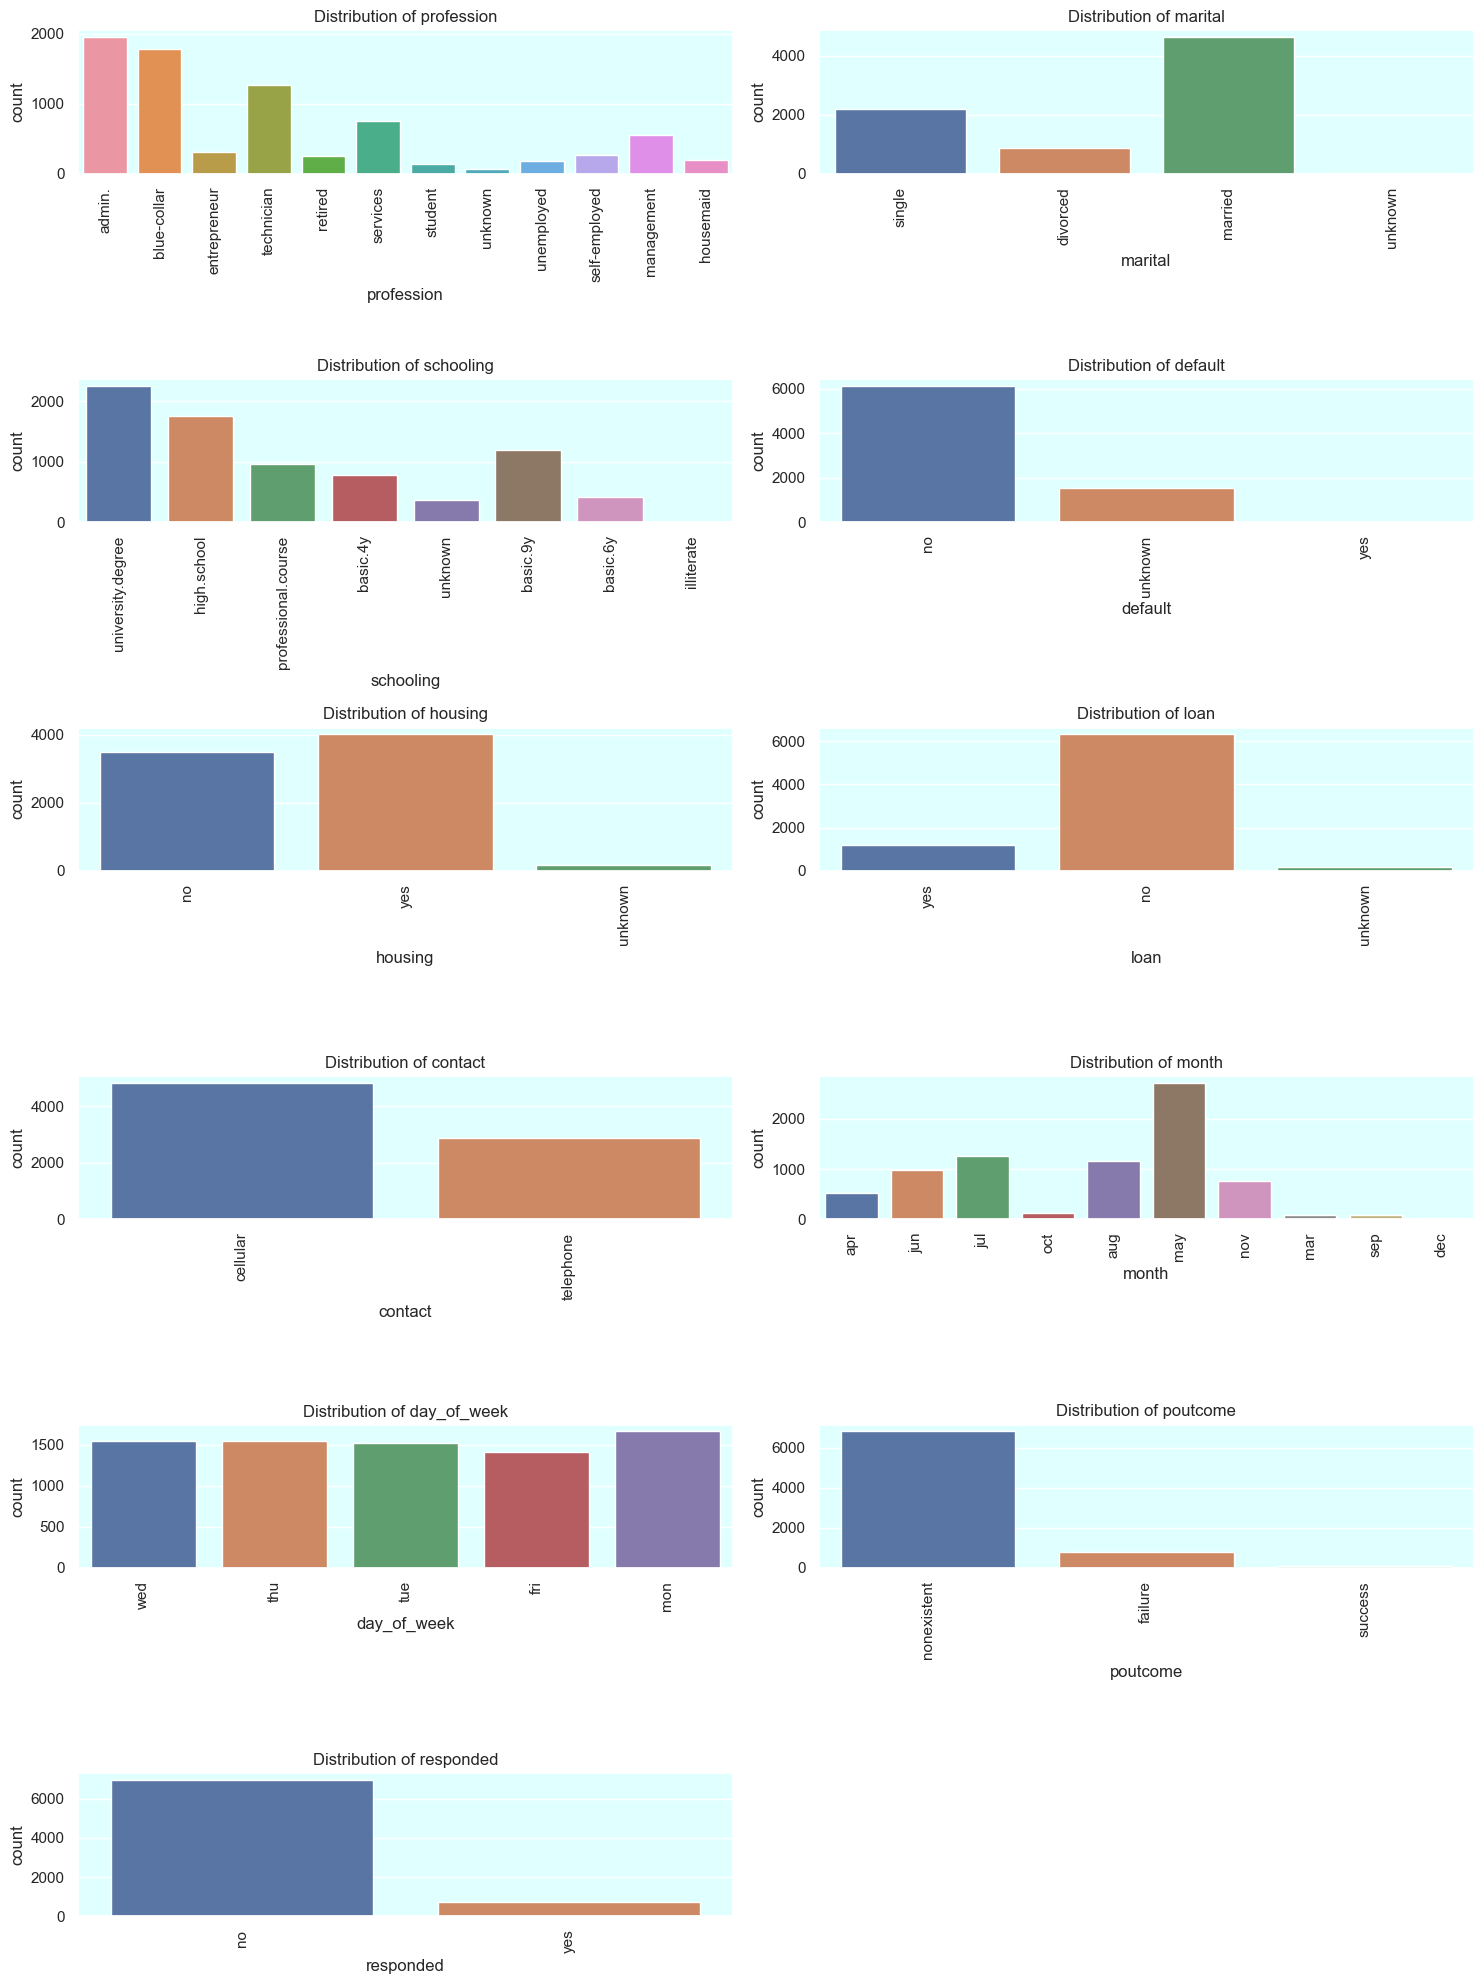

In [33]:
plt.figure(figsize=(15,20))
sns.set(style="darkgrid")


for i, column in enumerate(categorical, 1):
    plt.subplot(6, 2, i)
    plt.gca().set_facecolor('lightcyan')
    sns.countplot(x=column, data=cleaned_data)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Above plot displays the distribution count of categories from all categorical columns**

### Plot 7: Distribution of numerical columns using Boxplot 

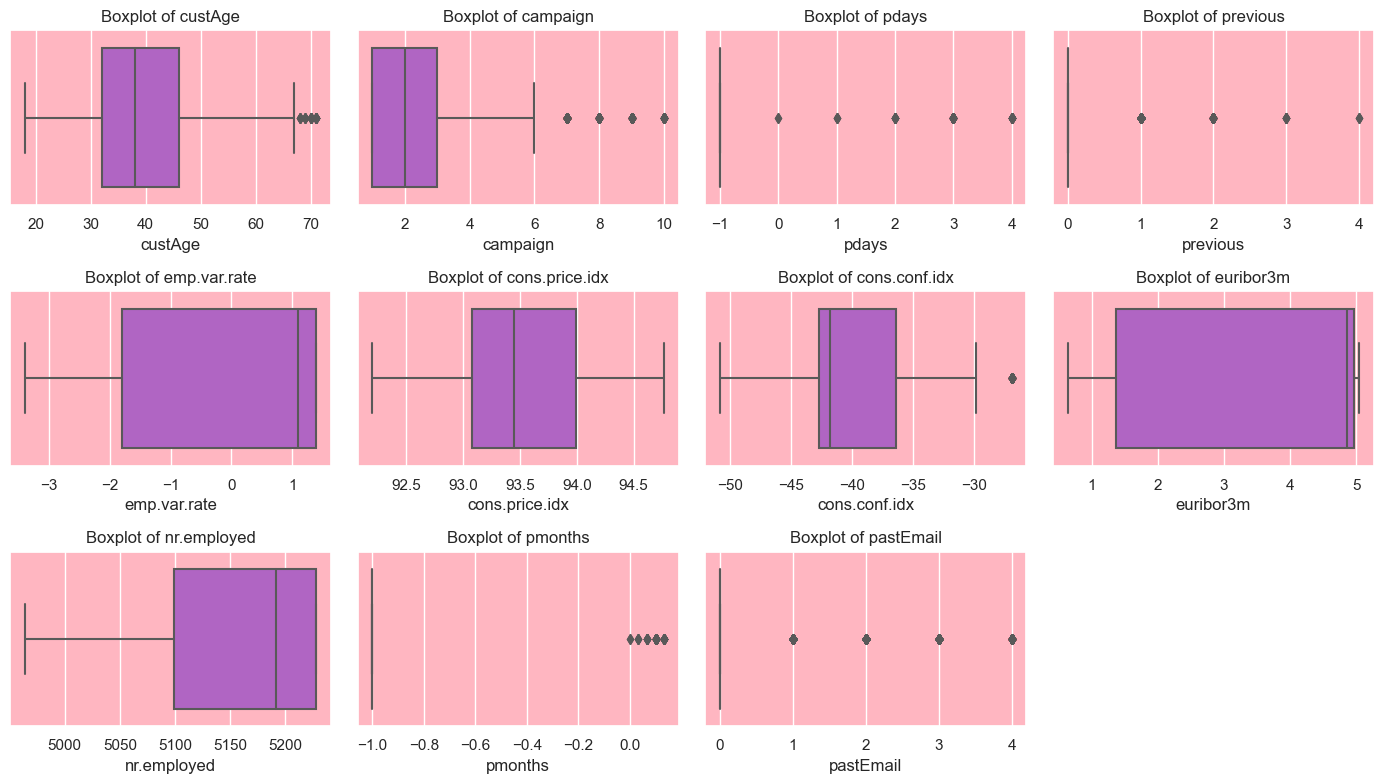

In [34]:
plt.figure(figsize=(14, 8))

for i, column in enumerate(numerical, 1):
    plt.subplot(3, 4, i)
    plt.gca().set_facecolor('lightpink')
    sns.boxplot(x=column, data=cleaned_data, color = 'mediumorchid')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


**The boxplot displays the distribution of values with in the upper and lower limits**

### Plot 8: Distribution of numerical columns using Volin Chart

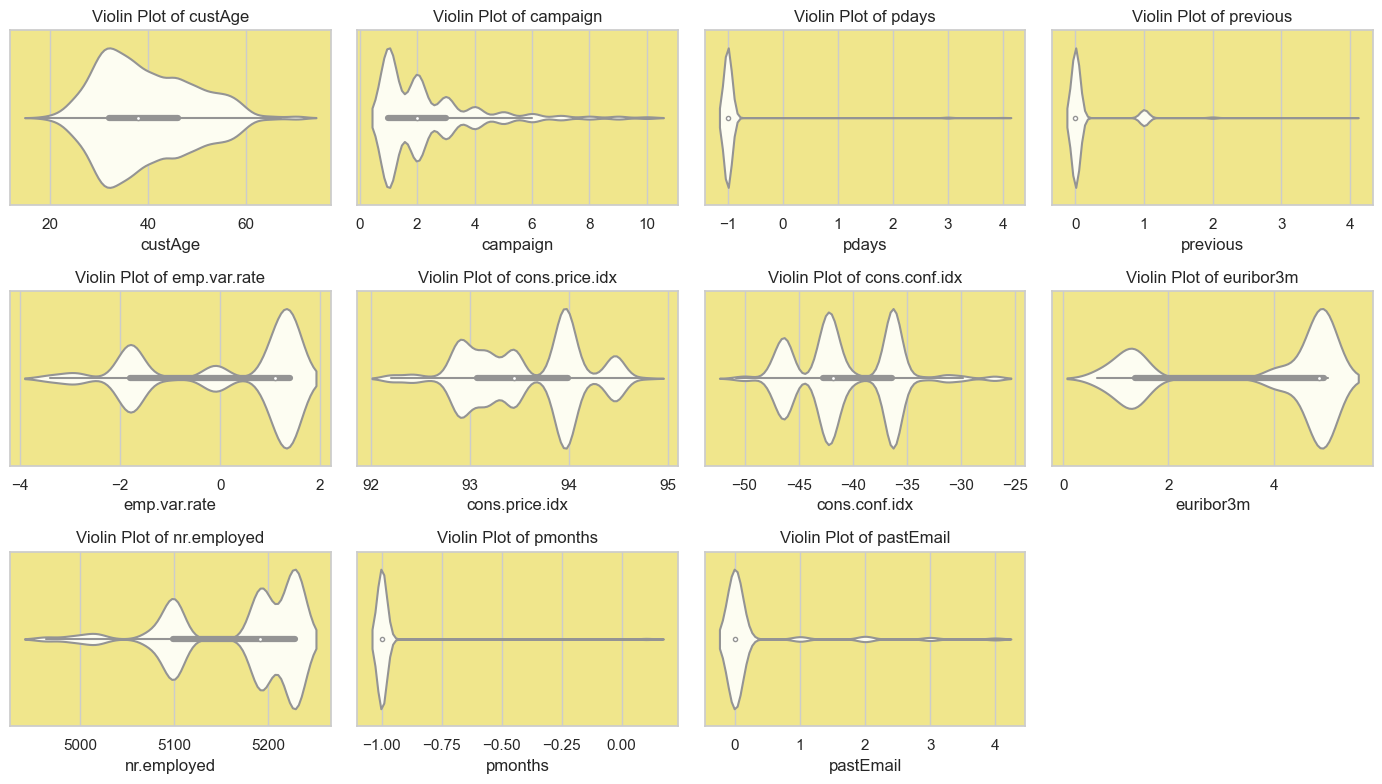

In [35]:

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

for i, column in enumerate(numerical, 1):
    plt.subplot(3, 4, i)
    plt.gca().set_facecolor('khaki')
    sns.violinplot(x=column, data=cleaned_data, color='ivory')
    plt.title(f'Violin Plot of {column}')

plt.tight_layout()
plt.show()


**Voilin Plot displays the density of each value in each numerical columns**

### Plot 9: Distribution on Outcome with responded column

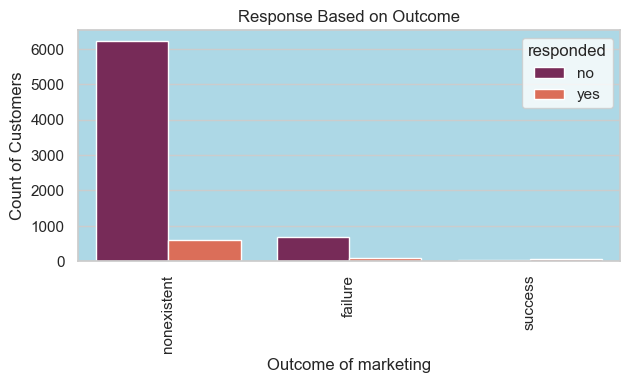

In [36]:
plt.figure(figsize=(7,3))
plt.gca().set_facecolor('lightblue')
sns.countplot(x = 'poutcome', data = cleaned_data, hue = 'responded', palette='rocket')
plt.title('Response Based on Outcome')
plt.xlabel('Outcome of marketing')
plt.ylabel('Count of Customers')
plt.xticks(rotation = 90)
plt.show()

### Plot 10: Plot for Response Based on Previous Contact Month

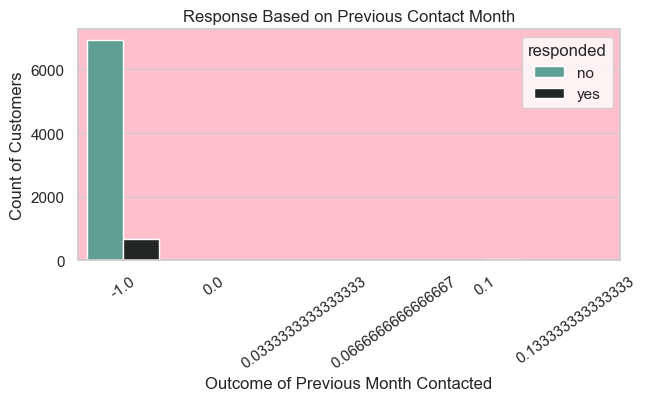

In [37]:
plt.figure(figsize=(7,3))
plt.gca().set_facecolor('pink')
sns.countplot(x = 'pmonths', data = cleaned_data, hue = 'responded', palette='dark:#5A9_r')
plt.title('Response Based on Previous Contact Month')
plt.xlabel('Outcome of Previous Month Contacted')
plt.ylabel('Count of Customers')
plt.xticks(rotation = 35)
plt.show()

**Never contacted customers have responded more than contacted customers**

### Plot 11: Response Based on Contact Type

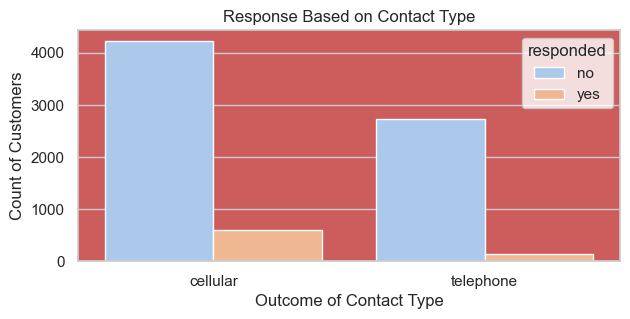

In [38]:
plt.figure(figsize=(7,3))
plt.gca().set_facecolor('indianred')
sns.countplot(x='contact', data = cleaned_data, hue = 'responded', palette='pastel')
plt.title('Response Based on Contact Type')
plt.xlabel('Outcome of Contact Type')
plt.ylabel('Count of Customers')
plt.show()

**Customers contacted via cellular responded more than contacted via email**

### Plot 12: Distribution of employee variance rate on target column

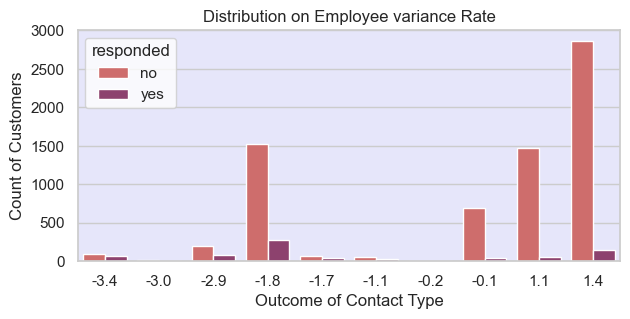

In [39]:
plt.figure(figsize=(7,3))
plt.gca().set_facecolor('lavender')
sns.countplot(x='emp.var.rate', data = cleaned_data, hue = 'responded', palette='flare')
plt.title('Distribution on Employee variance Rate')
plt.xlabel('Outcome of Contact Type')
plt.ylabel('Count of Customers')
plt.show()

**Customers with -1.8 variance rate and 1.4 variance rate responded more**

### Plot 13: Distribution on No. of Employees

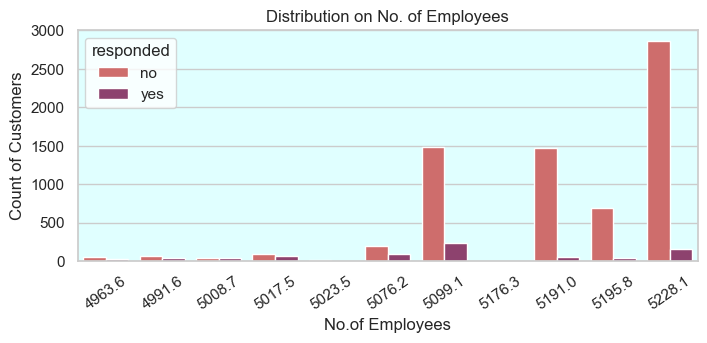

In [40]:
plt.figure(figsize=(8,3))
plt.gca().set_facecolor('lightcyan')
sns.countplot(x='nr.employed', data = cleaned_data, hue = 'responded', palette='flare')
plt.title('Distribution on No. of Employees')
plt.xlabel('No.of Employees')
plt.ylabel('Count of Customers')
plt.xticks(rotation = 35)
plt.show()

**Customers with 5076.2 and 5099.1 and 5228.1 nr.employee rate responded more**

### Plot 14: Response on Contact Count

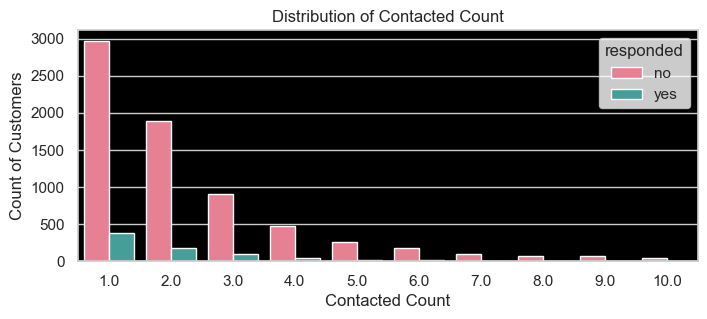

In [41]:
plt.figure(figsize=(8,3))
plt.gca().set_facecolor('black')
sns.countplot(x='campaign', data = cleaned_data, hue = 'responded', palette='husl')
plt.title('Distribution of Contacted Count')
plt.xlabel('Contacted Count')
plt.ylabel('Count of Customers')
plt.show()

**Customers contacted once and twice responded more**

### Plot 15: Countplot to find balance of data in target column

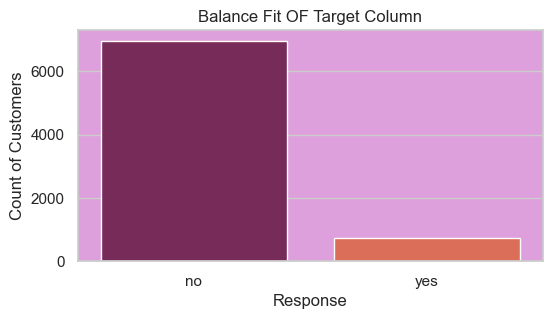

In [42]:
plt.figure(figsize=(6,3))
plt.gca().set_facecolor('plum')
sns.countplot(x = 'responded', data = cleaned_data, palette='rocket')
plt.title('Balance Fit OF Target Column')
plt.xlabel('Response')
plt.ylabel('Count of Customers')
plt.show()

**The countplot clearly displays that the data is highly imbalanced in the target column**

**______________________________________________________________________________________________________________**

## Feature Engineering

As the categorical columns are related opted for Label Encoding and for Scaling opted for Standar Scaler

### Encoding the Categorical Columns

In [43]:
## Define encoder
encoder = LabelEncoder()

In [44]:
for col in categorical:
    cleaned_data[col] =  encoder.fit_transform(cleaned_data[col])

In [45]:
cleaned_data

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,34.0,0,2,6,0,0,2,0,0,4,2.0,-1.0,0.0,1,-1.8,93.075,-47.1,1.498,5099.1,-1.000000,0.0,0
2,31.0,0,2,3,0,0,0,1,4,2,1.0,-1.0,0.0,1,1.4,94.465,-41.8,4.961,5228.1,-1.000000,0.0,0
3,52.0,0,0,6,1,2,0,0,3,3,2.0,-1.0,0.0,1,1.4,93.918,-42.7,4.962,5228.1,-1.000000,0.0,0
4,39.0,1,2,6,1,2,0,0,3,3,6.0,-1.0,0.0,1,1.4,93.918,-42.7,4.961,5228.1,-1.000000,0.0,0
5,40.0,2,1,6,0,2,0,1,4,2,3.0,-1.0,0.0,1,1.4,94.465,-41.8,4.866,5228.1,-1.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8230,28.0,0,1,6,0,0,0,0,0,2,1.0,2.0,2.0,2,-1.8,93.075,-47.1,1.365,5099.1,0.066667,0.0,1
8231,34.0,0,2,6,0,2,0,0,1,4,1.0,-1.0,0.0,1,1.4,93.444,-36.1,4.965,5228.1,-1.000000,0.0,1
8232,52.0,7,1,3,1,2,0,0,3,0,3.0,-1.0,0.0,1,1.4,93.918,-42.7,4.962,5228.1,-1.000000,0.0,1
8235,32.0,6,2,6,0,0,0,0,0,2,1.0,-1.0,0.0,1,-1.8,93.075,-47.1,1.435,5099.1,-1.000000,0.0,1


### Scaling the Numerical Columns

In [46]:
## Define Scaler
sc_x = StandardScaler()

## Perform Scaling using fit_transform
cleaned_data[numerical] = sc_x.fit_transform(cleaned_data[numerical])

## Display data after scaling
cleaned_data

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,-0.571474,0,2,6,0,0,2,0,0,4,-0.158712,-0.108228,-0.336683,1,-1.249216,-0.872271,-1.417032,-1.279324,-1.051718,-0.110613,-0.293841,0
2,-0.881628,0,2,3,0,0,0,1,4,2,-0.740933,-0.108228,-0.336683,1,0.833753,1.574891,-0.251449,0.759341,0.852462,-0.110613,-0.293841,0
3,1.289453,0,0,6,1,2,0,0,3,3,-0.158712,-0.108228,-0.336683,1,0.833753,0.611871,-0.449378,0.759930,0.852462,-0.110613,-0.293841,0
4,-0.054550,1,2,6,1,2,0,0,3,3,2.170174,-0.108228,-0.336683,1,0.833753,0.611871,-0.449378,0.759341,0.852462,-0.110613,-0.293841,0
5,0.048835,2,1,6,0,2,0,1,4,2,0.423509,-0.108228,-0.336683,1,0.833753,1.574891,-0.251449,0.703414,0.852462,-0.110613,-0.293841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8230,-1.191783,0,1,6,0,0,0,0,0,2,-0.740933,6.694223,5.023057,2,-1.249216,-0.872271,-1.417032,-1.357620,-1.051718,8.771967,-0.293841,1
8231,-0.571474,0,2,6,0,2,0,0,1,4,-0.740933,-0.108228,-0.336683,1,0.833753,-0.222629,1.002102,0.761696,0.852462,-0.110613,-0.293841,1
8232,1.289453,7,1,3,1,2,0,0,3,0,0.423509,-0.108228,-0.336683,1,0.833753,0.611871,-0.449378,0.759930,0.852462,-0.110613,-0.293841,1
8235,-0.778244,6,2,6,0,0,0,0,0,2,-0.740933,-0.108228,-0.336683,1,-1.249216,-0.872271,-1.417032,-1.316412,-1.051718,-0.110613,-0.293841,1


## Train and Test Split

In [47]:
## Define X and y
X = cleaned_data.drop('responded', axis = True)
y = cleaned_data['responded']


## Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Print Shape of train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5382, 21)
(2307, 21)
(5382,)
(2307,)


## Sampling the Training Dataset

- As the dat is highly imbalanced at target column we need to using sampling technique.
- Going forward with **Undersampling the training data and then Oversampling the undersampled data**.

In [48]:
## Define Under Sampler
under = RandomUnderSampler(sampling_strategy=0.5)

## Define Over Sampler
over = SMOTE(sampling_strategy=0.5)

In [49]:
# Apply under-sampling to the training data
x_train_, y_train_ = under.fit_resample(X_train, y_train)

# Apply over-sampling to the under-sampled training data
x_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train)

In [50]:
## Print resampled Data shape
print(x_train_resampled.shape)
print(y_train_resampled.shape)

(7272, 21)
(7272,)


# Model Selection

### As the output variable is classification output we can opt any of the classification models:
#### -  **Models opted for training are:**
            - Logistic Regression, Desicion Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, Support Vector Classifier,KNeighbours Classifier, XG Boosting Classifier, Neural Network Classifier.

# Model Training

### 1. Logistic Regression Classifier

In [51]:
## Define Model
lgr = LogisticRegression()

# Train Model
lgr.fit(x_train_resampled,y_train_resampled)

LogisticRegression()

In [52]:
## Predict Test data
lgr_pred = lgr.predict(X_test)

--------------------------------------------------
Logistic Regression Model Accuracy: 0.8669267446900737
--------------------------------------------------
Logistic Regression Model ROC AUC Score: 0.6598568411713331
--------------------------------------------------
Logistic Regression Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.94      0.91      0.93      2101
           1       0.31      0.41      0.35       206

    accuracy                           0.87      2307
   macro avg       0.63      0.66      0.64      2307
weighted avg       0.88      0.87      0.87      2307

--------------------------------------------------


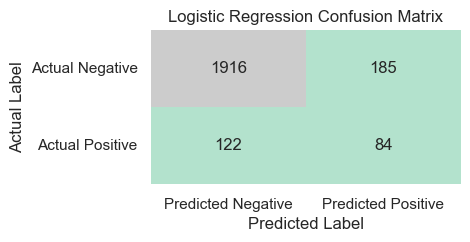

In [53]:
### Performance Evaluation

### Accuracy Score
lgr_accuracy = accuracy_score(y_test, lgr_pred)
print("-"*50)
print("Logistic Regression Model Accuracy:", lgr_accuracy)

### ROC AUC Score
lgr_roc = roc_auc_score(y_test, lgr_pred)
print("-"*50)
print("Logistic Regression Model ROC AUC Score:", lgr_roc)

### Classification Report
print("-"*50)
print("Logistic Regression Model Classiffication Report: \n\n",classification_report(y_test, lgr_pred))
print("-"*50)

## Confusion Matrix
lgr_confusion_matrix = confusion_matrix(y_test, lgr_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(lgr_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

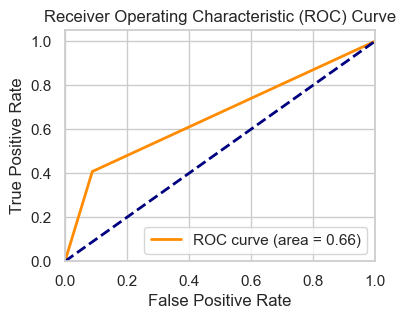

In [54]:
## Plotting ROC Curve 

# Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,lgr_pred)

# Define AUC
roc_auc = auc(fpr, tpr)

## PlotROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

### 2. Decision Tree Classifier

In [55]:
## Define Model
dtc = DecisionTreeClassifier()

# Train Model
dtc.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier()

In [56]:
## Predict Test data
dtc_pred = dtc.predict(X_test)

--------------------------------------------------
Decision Tree Model Accuracy: 0.8339835283918509
--------------------------------------------------
Decision Tree Model ROC AUC Score: 0.584850949386099
--------------------------------------------------
Decision Tree Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.93      0.89      0.91      2101
           1       0.20      0.28      0.23       206

    accuracy                           0.83      2307
   macro avg       0.56      0.58      0.57      2307
weighted avg       0.86      0.83      0.85      2307

--------------------------------------------------


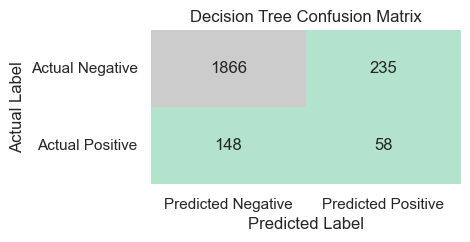

In [57]:
### Performance Evaluation

### Accuracy Score
dtc_accuracy = accuracy_score(y_test, dtc_pred)
print("-"*50)
print("Decision Tree Model Accuracy:", dtc_accuracy)

### ROC AUC Score
dtc_roc = roc_auc_score(y_test, dtc_pred)
print("-"*50)
print("Decision Tree Model ROC AUC Score:", dtc_roc)

### Classification Report
print("-"*50)
print("Decision Tree Model Classiffication Report: \n\n",classification_report(y_test, dtc_pred))
print("-"*50)

## Confusion Matrix
dtc_confusion_matrix = confusion_matrix(y_test, dtc_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(dtc_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

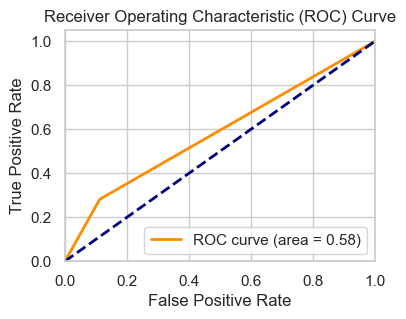

In [58]:
## Plotting ROC Curve 

# Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,dtc_pred)

## Define AUC
roc_auc = auc(fpr, tpr)

## Plot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

### 3. Random Forest Classifier

In [59]:
## Define Model
rfc = RandomForestClassifier() 

# Train Model
rfc.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier()

In [60]:
## Predict Test data
rfc_pred = rfc.predict(X_test)

--------------------------------------------------
Random Forest Model Accuracy: 0.9011703511053316
--------------------------------------------------
Random Forest Model ROC AUC Score: 0.602035322985356
--------------------------------------------------
Random Forest Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2101
           1       0.41      0.24      0.30       206

    accuracy                           0.90      2307
   macro avg       0.67      0.60      0.62      2307
weighted avg       0.88      0.90      0.89      2307

--------------------------------------------------


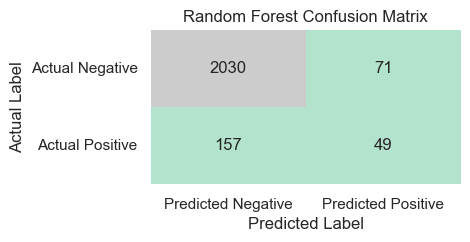

In [61]:
### Performance Evaluation

### Accuracy Score
rfc_accuracy = accuracy_score(y_test, rfc_pred)
print("-"*50)
print("Random Forest Model Accuracy:", rfc_accuracy)

### ROC AUC Score
rfc_roc = roc_auc_score(y_test, rfc_pred)
print("-"*50)
print("Random Forest Model ROC AUC Score:", rfc_roc)

### Classification Report
print("-"*50)
print("Random Forest Model Classiffication Report: \n\n",classification_report(y_test, rfc_pred))
print("-"*50)

## Confusion Matrix
rfc_confusion_matrix = confusion_matrix(y_test, rfc_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(rfc_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

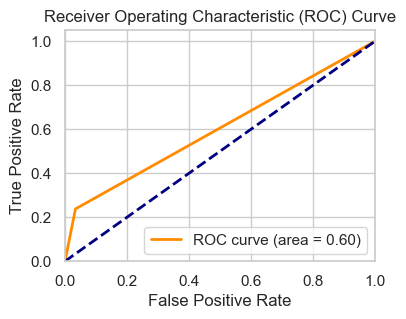

In [62]:
## Plotting ROC Curve

## Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,rfc_pred)
## Define Auc
roc_auc = auc(fpr, tpr)

## Plot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

### 4. Gradient Boosting Classifier

In [63]:
## Define Model
gbc = GradientBoostingClassifier()

# Train Model
gbc.fit(x_train_resampled,y_train_resampled)

GradientBoostingClassifier()

In [64]:
## Predict Test data
gbc_pred = gbc.predict(X_test)

--------------------------------------------------
Gradient Boosting Model Accuracy: 0.9029042045947118
--------------------------------------------------
Gradient Boosting Model ROC AUC Score: 0.6314468838232372
--------------------------------------------------
Gradient Boosting Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.93      0.96      0.95      2101
           1       0.44      0.30      0.36       206

    accuracy                           0.90      2307
   macro avg       0.69      0.63      0.65      2307
weighted avg       0.89      0.90      0.89      2307

--------------------------------------------------


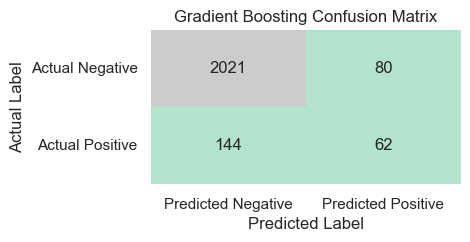

In [65]:
### Performance Evaluation

### Accuracy Score
gbc_accuracy = accuracy_score(y_test, gbc_pred)
print("-"*50)
print("Gradient Boosting Model Accuracy:", gbc_accuracy)

### ROC AUC Score
gbc_roc = roc_auc_score(y_test, gbc_pred)
print("-"*50)
print("Gradient Boosting Model ROC AUC Score:", gbc_roc)

### Classification Report
print("-"*50)
print("Gradient Boosting Model Classiffication Report: \n\n",classification_report(y_test, gbc_pred))
print("-"*50)

## Confusion Matrix
gbc_confusion_matrix = confusion_matrix(y_test, gbc_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(gbc_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

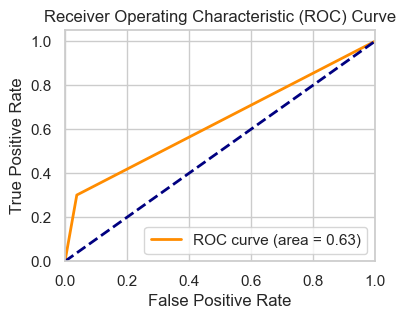

In [66]:
## Plotting ROC Curve

## Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,gbc_pred)
## Define AUC
roc_auc = auc(fpr, tpr)

## Plot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

### 5. Support Vector Machines

In [67]:
## Define Model
svc = SVC()

# Train Model
svc.fit(x_train_resampled,y_train_resampled)

SVC()

In [68]:
## Predict Test data
svc_pred = svc.predict(X_test)

--------------------------------------------------
Support Vector Model Accuracy: 0.871261378413524
--------------------------------------------------
Support Vector Model ROC AUC Score: 0.675371875620948
--------------------------------------------------
Support Vector Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.94      0.91      0.93      2101
           1       0.33      0.44      0.38       206

    accuracy                           0.87      2307
   macro avg       0.64      0.68      0.65      2307
weighted avg       0.89      0.87      0.88      2307

--------------------------------------------------


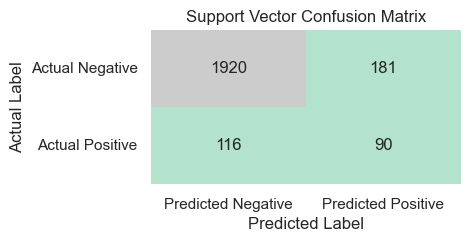

In [69]:
### Performance Evaluation

### Accuracy Score
svc_accuracy = accuracy_score(y_test, svc_pred)
print("-"*50)
print("Support Vector Model Accuracy:", svc_accuracy)

### ROC AUC Score
svc_roc = roc_auc_score(y_test, svc_pred)
print("-"*50)
print("Support Vector Model ROC AUC Score:", svc_roc)

### Classification Report
print("-"*50)
print("Support Vector Model Classiffication Report: \n\n",classification_report(y_test, svc_pred))
print("-"*50)

## Confusion Matrix
svc_confusion_matrix = confusion_matrix(y_test, svc_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(svc_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Support Vector Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

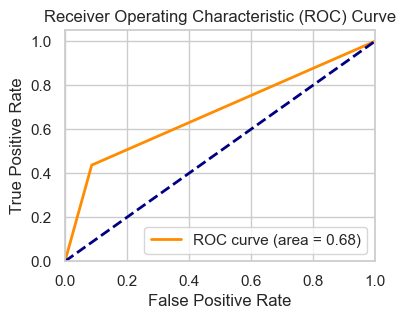

In [70]:
## Plotting ROC Curve

## Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,svc_pred)
## Define AUC 
roc_auc = auc(fpr, tpr)

## Plot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

### 6. K Nearest Neighbors 

In [71]:
## Define Model
knn = KNeighborsClassifier()

# Train Model
knn.fit(x_train_resampled,y_train_resampled)

KNeighborsClassifier()

In [72]:
## Predict Test data
knn_pred = knn.predict(X_test)

--------------------------------------------------
K-Nearest Neighbours Model Accuracy: 0.8092761161681837
--------------------------------------------------
K-Nearest Neighbours Model ROC AUC Score: 0.6128808288239996
--------------------------------------------------
K-Nearest Neighbours Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.93      0.85      0.89      2101
           1       0.20      0.37      0.26       206

    accuracy                           0.81      2307
   macro avg       0.57      0.61      0.57      2307
weighted avg       0.87      0.81      0.83      2307

--------------------------------------------------


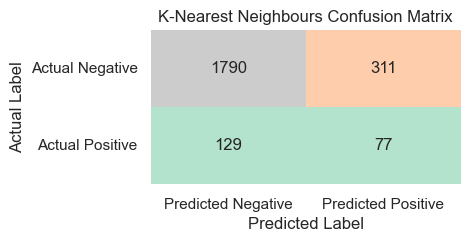

In [73]:
### Performance Evaluation

### Accuracy Score
knn_accuracy = accuracy_score(y_test, knn_pred)
print("-"*50)
print("K-Nearest Neighbours Model Accuracy:", knn_accuracy)

### ROC AUC Score
knn_roc = roc_auc_score(y_test, knn_pred)
print("-"*50)
print("K-Nearest Neighbours Model ROC AUC Score:", knn_roc)

### Classification Report
print("-"*50)
print("K-Nearest Neighbours Model Classiffication Report: \n\n",classification_report(y_test, knn_pred))
print("-"*50)

## Confusion Matrix
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(knn_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('K-Nearest Neighbours Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

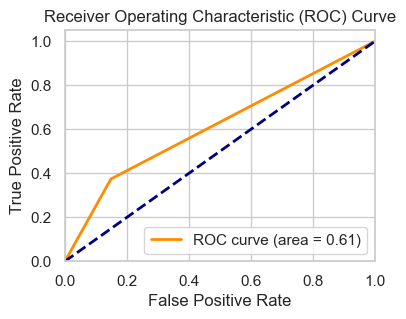

In [74]:
## Plotting ROC Curve

## Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,knn_pred)
## Define AUC
roc_auc = auc(fpr, tpr)

## PLot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

### 7. XG Boosting

In [75]:
## Define Model
xgc  = XGBClassifier()

# Train Model
xgc.fit(x_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
## Predict Test data
xgc_pred = xgc.predict(X_test)

--------------------------------------------------
XG Boosting Model Accuracy: 0.9072388383181621
--------------------------------------------------
XG Boosting Model ROC AUC Score: 0.5966102595620209
--------------------------------------------------
XG Boosting Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2101
           1       0.46      0.22      0.30       206

    accuracy                           0.91      2307
   macro avg       0.69      0.60      0.62      2307
weighted avg       0.89      0.91      0.89      2307

--------------------------------------------------


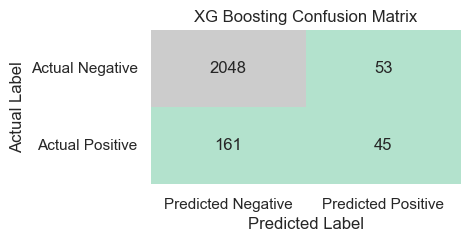

In [77]:
### Performance Evaluation

### Accuracy Score
xgc_accuracy = accuracy_score(y_test, xgc_pred)
print("-"*50)
print("XG Boosting Model Accuracy:", xgc_accuracy)

### ROC AUC Score
xgc_roc = roc_auc_score(y_test, xgc_pred)
print("-"*50)
print("XG Boosting Model ROC AUC Score:", xgc_roc)

### Classification Report
print("-"*50)
print("XG Boosting Model Classiffication Report: \n\n",classification_report(y_test, xgc_pred))
print("-"*50)

## Confusion Matrix
xgc_confusion_matrix = confusion_matrix(y_test, xgc_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(xgc_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('XG Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

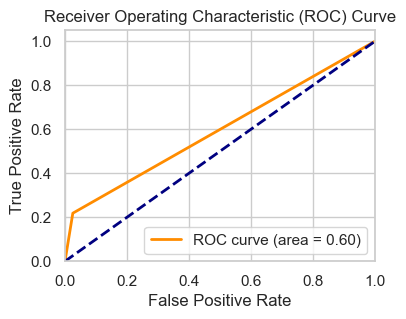

In [78]:
## Plotting ROC Curve

## Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,xgc_pred)
## Define AUC
roc_auc = auc(fpr, tpr)

## Plot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

### 8. Neural Networks

In [79]:
## Define Model
nnc = MLPClassifier()

# Train Model
nnc.fit(x_train_resampled,y_train_resampled)

MLPClassifier()

In [80]:
## Predict Test data
nnc_pred = nnc.predict(X_test)

--------------------------------------------------
Neural Network Model Accuracy: 0.8608582574772432
--------------------------------------------------
Neural Network Model ROC AUC Score: 0.5842814101468095
--------------------------------------------------
Neural Network Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.93      0.92      0.92      2101
           1       0.24      0.25      0.24       206

    accuracy                           0.86      2307
   macro avg       0.58      0.58      0.58      2307
weighted avg       0.86      0.86      0.86      2307

--------------------------------------------------


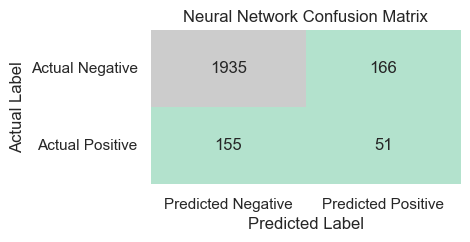

In [81]:
### Performance Evaluation

### Accuracy Score
nnc_accuracy = accuracy_score(y_test, nnc_pred)
print("-"*50)
print("Neural Network Model Accuracy:", nnc_accuracy)

### ROC AUC Score
nnc_roc = roc_auc_score(y_test, nnc_pred)
print("-"*50)
print("Neural Network Model ROC AUC Score:", nnc_roc)

### Classification Report
print("-"*50)
print("Neural Network Model Classiffication Report: \n\n",classification_report(y_test, nnc_pred))
print("-"*50)

## Confusion Matrix
nnc_confusion_matrix = confusion_matrix(y_test, nnc_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(nnc_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

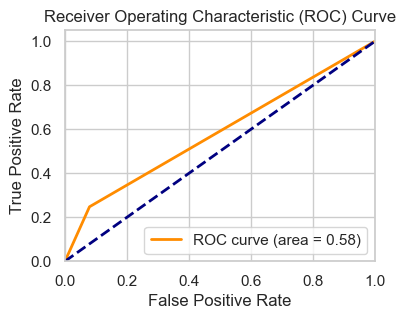

In [82]:
## Plotting ROC Curve

## Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,nnc_pred)
## Define AUC
roc_auc = auc(fpr, tpr)

## Plot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

### Compare Models and Find best Model

In [83]:
## List of tuples containing (model, accuracy)
model_accuracy_list = [('Logistic Regression', lgr_accuracy, lgr_roc), ("Decision Tree Classifier", dtc_accuracy, dtc_roc), 
                       ("Random Forest Classifier", rfc_accuracy, rfc_roc),
                       ("Gradient Boosting Classifier", gbc_accuracy, gbc_roc),
                      ('Support Vector Machines', svc_accuracy, svc_roc),
                       ('KNeighbours Classifiers', knn_accuracy, knn_roc),
                         ('XG Boosting', xgc_accuracy, xgc_roc), ('Neural Network', nnc_accuracy, nnc_roc)] 
model_accuracy_list

[('Logistic Regression', 0.8669267446900737, 0.6598568411713331),
 ('Decision Tree Classifier', 0.8339835283918509, 0.584850949386099),
 ('Random Forest Classifier', 0.9011703511053316, 0.602035322985356),
 ('Gradient Boosting Classifier', 0.9029042045947118, 0.6314468838232372),
 ('Support Vector Machines', 0.871261378413524, 0.675371875620948),
 ('KNeighbours Classifiers', 0.8092761161681837, 0.6128808288239996),
 ('XG Boosting', 0.9072388383181621, 0.5966102595620209),
 ('Neural Network', 0.8608582574772432, 0.5842814101468095)]

In [84]:
## Threshold for minimum accuracy 
min_accuracy_threshold = 0.75

best_model = None
best_accuracy = 0.0

## Find the best model with the highest accuracy
for model, accuracy, roc_score in model_accuracy_list:
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_roc = roc_score

## Best Model Display
if best_model is not None:
    print("Best Model:", best_model)
    print('-'*50)
    print("Validation Accuracy of the Best Model:", best_accuracy)
    print('-'*50)
    print('ROC AUC Score of the Best Model:', best_roc)
else:
    print("No model met the accuracy threshold.")

Best Model: XG Boosting
--------------------------------------------------
Validation Accuracy of the Best Model: 0.9072388383181621
--------------------------------------------------
ROC AUC Score of the Best Model: 0.5966102595620209


## Hyperparameter Tuning

From the list of models, **"XG Boosting Model"** has the highest accuracy (0.9059) among all models. This model would be a good candidate for hyperparameter tuning and cross-validation to further improve its performance.

### Tuning : RandomSearchCV

In [85]:
# Create a XGBoostingClassifier
Xg_classifier = XGBClassifier()

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 10),
}

In [86]:

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    Xg_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    scoring='accuracy',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)


# Fit the model to the data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D3DC49550>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D3B529D90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D2F6B3A50>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020D2E2B40D0>},
                   random_state=42, scoring='accuracy', verbose=1)

In [87]:
# Get the best parameters and best estimator
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_estimator = random_search.best_estimator_
print('Best Model :' , best_estimator)

Best Hyperparameters: {'colsample_bytree': 0.662397808134481, 'learning_rate': 0.027425083650459835, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 153, 'subsample': 0.8832290311184181}
Best Model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.662397808134481, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.027425083650459835,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=153, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy of Best Model : 0.9137407889033377
--------------------------------------------------
ROC AUC Score of Best Model: 0.5651527474203223
--------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2101
           1       0.57      0.14      0.23       206

    accuracy                           0.91      2307
   macro avg       0.75      0.57      0.59      2307
weighted avg       0.89      0.91      0.89      2307

--------------------------------------------------


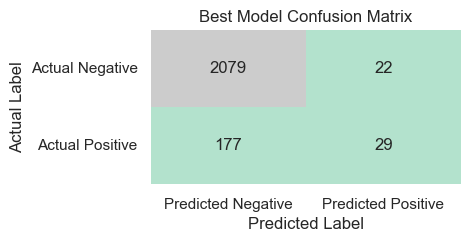

In [88]:
# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Evaluate the best model

## Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Best Model :", accuracy)
print('-'*50)

## ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score of Best Model:", roc_auc)
print('-'*50)

## CLassification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print('-'*50)

## Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Best Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

**There is an increase in accuracy of model performance with original training data**

## Cross Validation

In [89]:
# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(best_estimator, X_train, y_train, cv=kf, scoring='accuracy')

# Print the results
print("Cross-Validation Results:", cv_results)
print("Average Accuracy:", cv_results.mean())

Cross-Validation Results: [0.89972145 0.90529248 0.9070632  0.90613383 0.89962825]
Average Accuracy: 0.9035678412774022


# Hyperparameter tuning and cross-validation results:
The best estimator achieved an accuracy of approximately 91.3%, which is consistent with the cross-validation accuracy of 90.3%. This suggests that the chosen hyperparameters provide a stable and reliable model with minimal variance across different folds.

### Feature Importance

In [90]:
feature_importances = best_estimator.feature_importances_

In [91]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance = feature_importance_df.sort_values(by='Importance', ascending=True)

In [92]:
# Display feature importances
print(feature_importance)

           Feature  Importance
5          housing    0.014485
6             loan    0.015383
10        campaign    0.016775
2          marital    0.017156
3        schooling    0.018694
1       profession    0.018915
9      day_of_week    0.019561
20       pastEmail    0.022486
0          custAge    0.023453
8            month    0.025117
12        previous    0.027976
4          default    0.028337
17       euribor3m    0.042222
15  cons.price.idx    0.043378
16   cons.conf.idx    0.044291
13        poutcome    0.044486
7          contact    0.046683
11           pdays    0.051732
19         pmonths    0.052590
14    emp.var.rate    0.126218
18     nr.employed    0.300061


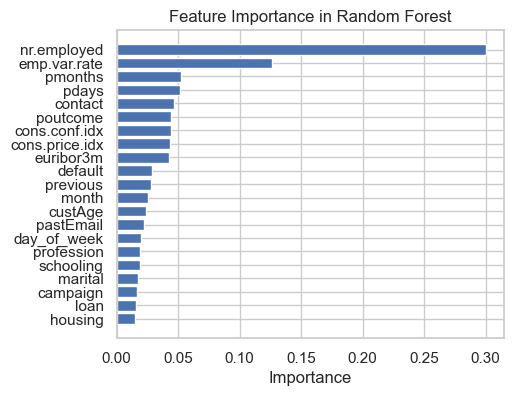

In [93]:
# Plot feature importances
plt.figure(figsize=(5, 4))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

**Feature importances indicate the contribution of each feature to the model's predictions.A higher importance value suggests a stronger influence on the model's decision-making.**
- Features with the highest importance:
 - 'nr.employed' (30%) and 'emp.var.rate' (12%) significantly impact the model, 
   indicating that economic factors play a crucial role in predicting the outcome.

## -----------------------------------------------------------------------------------------------------------------------------

## Predictions On Unseen Data 

### Reading the Test Data

In [94]:
## Read test.csv
test = pd.read_excel('test.xlsx')

## Shape pd test.csv
test.shape

(32950, 22)

In [95]:
test.head(2)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,NaN,admin.,married,NaN,no,no,yes,cellular,sep,wed,2,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1
1,35.0,services,married,high.school,no,no,no,cellular,sep,tue,2,3,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2


In [96]:
### Dropping Unwanted row

test.drop('id', axis =1, inplace = True)

### Handling Null values in Test Data

In [97]:
## Sum of Null values
test.isnull().sum()

custAge           8042
profession           0
marital              0
schooling         9770
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week       3328
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
dtype: int64

In [98]:
## Impute using Backward fill as 1st row is null 
test['custAge'].fillna(method='bfill', inplace=True)
test['schooling'].fillna(method = 'bfill', inplace=True)
test['day_of_week'].fillna(method = 'bfill', inplace=True)

### Replacing Values 999 with -1 as never contacted

In [99]:
## Replacing values 
test['pdays'] =test['pdays'].replace(999, -1)
test['pmonths']=test['pmonths'].replace(999, -1)

### Seperating Categorical And Numerical Columns

In [100]:
catcol = []
numcol = []

for col in test.columns:
    if test[col].dtype == 'object':
        catcol.append(col)
    else:
        numcol.append(col)
        

catcol, numcol

(['profession',
  'marital',
  'schooling',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome'],
 ['custAge',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'pmonths',
  'pastEmail'])

### Encoding Categorical Columns Of Unseen Data

In [101]:
for col in catcol:
    test[col] = encoder.fit_transform(test[col])

In [102]:
## scaling
test[numcol] = sc_x.fit_transform(test[numcol])

In [103]:
test

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,-0.484567,0,1,3,0,0,2,0,9,4,-0.207042,-0.169961,1.693246,0,-0.755891,1.074830,0.645487,-1.583998,-2.825567,-0.193214,1.330814
1,-0.484567,7,1,3,0,0,0,0,9,3,-0.207042,2.510216,1.693246,2,-2.219000,-2.069343,2.311247,-1.640572,-2.078278,4.678026,1.330814
2,0.954296,1,1,5,1,2,0,0,6,2,-0.566135,-0.169961,1.693246,0,-1.201185,-1.181373,-1.236606,-1.329416,-0.946948,-0.193214,1.330814
3,-0.964189,0,2,6,0,0,0,0,1,4,-0.566135,-0.169961,-0.347892,1,0.834444,-0.229484,0.948352,0.770165,0.841553,-0.193214,-0.274249
4,-0.100870,7,0,3,0,2,0,0,7,3,-0.566135,-0.169961,-0.347892,1,-0.119757,-0.651010,-0.328009,0.301988,0.393735,-0.193214,-0.274249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,-0.772340,9,1,5,0,2,0,1,6,2,-0.566135,-0.169961,-0.347892,1,0.643604,0.720679,0.883453,0.708395,0.327186,-0.193214,-0.274249
32946,-0.772340,1,1,3,0,0,2,0,6,2,0.511143,-0.169961,-0.347892,1,-1.201185,-1.181373,-1.236606,-1.364630,-0.946948,-0.193214,-0.274249
32947,-0.772340,7,1,3,0,0,0,0,6,1,-0.207042,-0.169961,-0.347892,1,-1.201185,-1.181373,-1.236606,-1.345580,-0.946948,-0.193214,-0.274249
32948,-0.772340,1,1,2,0,2,0,1,4,4,-0.566135,-0.169961,-0.347892,1,0.834444,1.534363,-0.284743,0.767278,0.841553,-0.193214,-0.274249


### Making Predictions on Unseen Data Using Best Model 

In [104]:
# Make predictions on the test set
test_pred = best_estimator.predict(test)

#### Creating Column in Test Data as Marketing Desicion using predictions

In [105]:
## Adding Decision Column
test['MarketingDecision'] = test_pred

## Value Counts
test['MarketingDecision'].value_counts()

MarketingDecision
0    32020
1      930
Name: count, dtype: int64

In [106]:
test.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,MarketingDecision
0,-0.484567,0,1,3,0,0,2,0,9,4,-0.207042,-0.169961,1.693246,0,-0.755891,1.074830,0.645487,-1.583998,-2.825567,-0.193214,1.330814,0
1,-0.484567,7,1,3,0,0,0,0,9,3,-0.207042,2.510216,1.693246,2,-2.219000,-2.069343,2.311247,-1.640572,-2.078278,4.678026,1.330814,1
2,0.954296,1,1,5,1,2,0,0,6,2,-0.566135,-0.169961,1.693246,0,-1.201185,-1.181373,-1.236606,-1.329416,-0.946948,-0.193214,1.330814,0
3,-0.964189,0,2,6,0,0,0,0,1,4,-0.566135,-0.169961,-0.347892,1,0.834444,-0.229484,0.948352,0.770165,0.841553,-0.193214,-0.274249,0
4,-0.100870,7,0,3,0,2,0,0,7,3,-0.566135,-0.169961,-0.347892,1,-0.119757,-0.651010,-0.328009,0.301988,0.393735,-0.193214,-0.274249,0


# -----------------------------------------------------------------------------------------------------------

## Getting exact list of Customers That can be Contacted for Marketing

In [107]:
## Read again
candidate = pd.read_excel('test.xlsx')

candidate.shape

(32950, 22)

In [108]:
candidate.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,NaN,admin.,married,NaN,no,no,yes,cellular,sep,wed,2,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1
1,35.0,services,married,high.school,no,no,no,cellular,sep,tue,2,3,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2
2,50.0,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3
3,30.0,admin.,single,university.degree,no,no,no,cellular,aug,wed,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4
4,39.0,services,divorced,high.school,no,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5


In [109]:
## Adding Decision Column to original Test data
candidate['MarketingDecision'] = test_pred

## GEtting customers count for marketing decision 1
candidate[candidate['MarketingDecision']==1].shape

(930, 23)

In [110]:
## Creating new dataframe with potential customers list
customers_list = candidate[candidate['MarketingDecision']==1]

In [111]:
## Exporting to Excel file
customers_list.to_excel('marketing_list.xlsx', index=False)

In [112]:
## List of Potential Customers
customers_list

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id,MarketingDecision
1,35.0,services,married,high.school,no,no,no,cellular,sep,tue,2,3,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.100000,2,2,1
32,NaN,admin.,single,high.school,no,yes,no,cellular,apr,wed,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,999.000000,0,33,1
35,19.0,student,single,unknown,no,yes,yes,cellular,apr,fri,4,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,999.000000,0,36,1
112,77.0,retired,married,NaN,no,yes,no,cellular,sep,thu,1,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,999.000000,0,113,1
147,70.0,retired,married,NaN,no,yes,no,cellular,may,thu,1,3,2,success,-1.8,93.876,-40.0,0.683,5008.7,0.100000,0,148,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32705,52.0,blue-collar,single,NaN,no,no,no,cellular,jun,fri,2,3,1,success,-2.9,92.963,-40.8,1.268,5076.2,0.100000,3,32706,1
32742,76.0,retired,married,NaN,no,yes,no,cellular,sep,wed,2,3,1,success,-3.4,92.379,-29.8,0.781,5017.5,0.100000,0,32743,1
32751,74.0,retired,divorced,basic.4y,no,yes,yes,cellular,jul,wed,2,999,0,nonexistent,-1.7,94.215,-40.3,0.896,4991.6,999.000000,0,32752,1
32924,52.0,management,married,high.school,no,yes,yes,cellular,aug,tue,1,10,4,failure,-2.9,92.201,-31.4,0.883,5076.2,0.333333,4,32925,1


### Above is the list of potential customers.
## This potential customer list, combined with strategic insights, positions us for a targeted and impactful marketing campaign that aligns with the preferences and behaviors of our customers.